### Логистическая регрессия на качественных переменных

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#### Загружаем данные и создаем копию сырых данных

In [2]:
raw = pd.read_csv('2.02. Binary predictors.csv')
raw.head(5)

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [3]:
data = raw.copy()

#### Маркируем качественные переменные 

In [4]:
data['Admitted'] = data['Admitted'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


#### Задаем перменные и формируем модель

In [5]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x).fit()
reg_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.8249
Time:                        22:46:05   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Определяем шансы необходимой качетсвенной переменной (в нашем случае переменная "Пол") 

In [7]:
np.exp(1.9449)

6.992932526814459

$$\frac{odds_2}{odds_1} = e^{1.9449} $$
$$\frac{odds_2}{odds_1} = 6.993 $$

При одинаковом результате SAT теста, у женщин в 7 раз выше шанс допуска, нежели у мужчины.

#### Визуализируем

Для визуализации используем параметр SAT как единственную независимую переменную

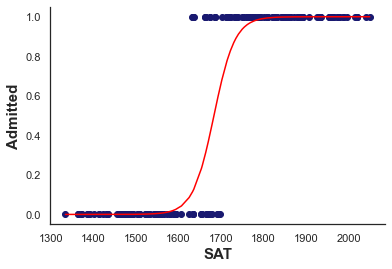

In [8]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

sns.set_style('white')

z = data['SAT']
f_sorted = np.sort(f(z,reg_log.params[0],reg_log.params[1]))
x_sorted = np.sort(np.array(z))
plt.scatter(z,y,color='midnightblue')
plt.xlabel('SAT', fontsize = 15, fontweight = 'bold')
plt.ylabel('Admitted', fontsize = 15, fontweight = 'bold')
plt.plot(x_sorted,f_sorted,color='red')
sns.despine()
plt.show()

#### Проверка точности

In [9]:
np.set_printoptions(formatter={'float':lambda x:'{0:0.2f}'.format(x)}) # Для красоты отформатируем получившийся массив в читаемый вид
reg_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [10]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

####  Формируем Confusion matrix (Матрицу ошибок) и изсеряем её точность

In [11]:
reg_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [12]:
cm_df = pd.DataFrame(reg_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'True 0', 1:'True 1'})
cm_df

,Predicted 0,Predicted 1
True 0,69.0,5.0
True 1,4.0,90.0


In [13]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train.round(3)

0.946

#### Teст и оценка модели

Для теста был выбран новый датасет. Его мы также загружаем и маркируем, как основной.

In [14]:
test = pd.read_csv('2.03. Test dataset.csv')
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [15]:
test['Admitted'] = test['Admitted'].map({'No':0,'Yes':1})
test['Gender'] = test['Gender'].map({'Male':0,'Female':1})
test.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


#### Сопоставляем независимые переменные модели и форматируем тестовый датасет

Нам необходимо добиться, чтобы порядок и количество столбцов было такое же как в модели

In [16]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


Создаем копию, зависимой переменной test_act и дропаем её из тестового датасета. А также добавляем константу

In [17]:
test_act = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


#### Cоздаем функцию, рассчитывающую матрицу ошибок и коэффициент точности

In [18]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values,bins = bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [19]:
cm = confusion_matrix(test_data, test_act, reg_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [20]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted  1']
cm_df = cm_df.rename (index = {0:'True 0', 1:'True 1'})
cm_df

,Predicted 0,Predicted 1
True 0,5.0,1.0
True 1,1.0,12.0


In [21]:
print (f'Точность модели: {cm[1].round(3)}')

Точность модели: 0.895
